In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [37]:
df=pd.read_csv('ice_cream.csv')
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [38]:
X=df[['Temperature (°C)']]
y=df['Ice Cream Sales (units)']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)


LinearRegression()

In [40]:

poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_train1,X_test1,y_train1,y_test1=train_test_split(X_poly,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(X_train1,y_train1)

LinearRegression()

In [46]:
y_poly_pred=model.predict(X_test1)
y_lreg_pred=lreg.predict(X_test)
print(y_poly_pred)
print(y_lreg_pred)



[10.07343479 25.97750742 31.91151123 24.77828411  4.48230212  4.26078042
  3.82709371  3.41047902  8.14303098  3.06025386 12.36027488 28.55230329
 11.45503333 17.61582251 33.90244476]
[18.05876349 13.95962752 13.64087259 14.02885865 17.28271941 15.94861693
 16.05940858 16.193973   15.33528893 16.81981635 18.27617604 19.3647407
 14.98791277 18.69224363 19.64017451]


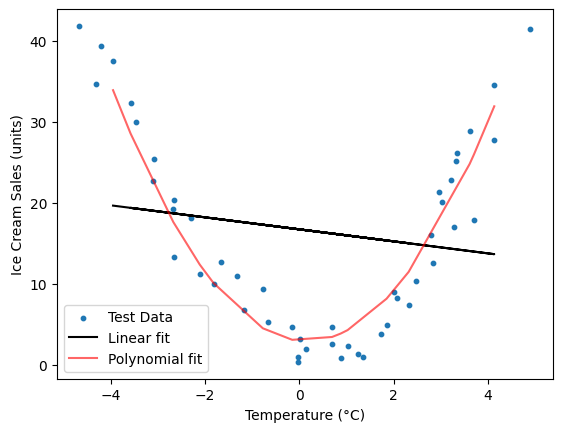

In [50]:
sorted_zip = sorted(zip(X_test1[:, 1], y_poly_pred))
X_test1_sorted, y_poly_pred_sorted = zip(*sorted_zip)

# Plotting
plt.scatter(X, y, s=10, label="Test Data")
plt.plot(X_test, y_lreg_pred, label="Linear fit", color='k')
plt.plot(X_test1_sorted, y_poly_pred_sorted, label="Polynomial fit", color='red', alpha=0.6)

plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()